In [3]:
import json, csv, os, ast
from os import listdir
from os.path import isfile, join
import pandas as pd
import numpy as np
import scipy as sp
from IPython.display import display, HTML
import xml.etree.ElementTree
import seaborn as sns
import pylab as plt
from matplotlib.backends.backend_pdf import PdfPages
from collections import Counter


%matplotlib inline

sns.set_style('whitegrid')
plt.rcParams['figure.figsize']=(5,4)

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

In [13]:
gold_dict = ['HIGH', 'LOW']

jitter = .2
alpha = .6
linewidth = .6
size = 10

In [29]:
# S100
#df = pd.read_csv('../../Task/BigTask/Parsed-results_S100.csv')
# S6
df = pd.read_csv('../../Task/BigTask/Parsed-results_S6.csv')
#df =  df.dropna()
#df["S100_rel"] = df["S100_rel"].astype(int)

df = df[['doc_id', 'party', 'S6_rel', 'rel']]
df = df[df["rel"].isin(gold_dict) == False]
df = df.replace('LIE', 0).replace('FALSE', 1).replace('BARELYTRUE', 2).replace('HALFTRUE', 3).replace('MOSTLYTRUE', 4).replace('TRUE', 5)

def party_replace(n):
    if (n == 1):
        return 'REP'
    if(n == 2):
        return 'DEM'
    if(n == 3):
        return 'IND'
    if(n == 4):
        return 'ELS'
    
def get_party(doc_name):
    temp = doc_name.split('_')
    return temp[0]  
df['worker_party'] = df.apply(lambda row: party_replace(row.party), axis = 1)

df['party_doc'] = df['doc_id']
df['party_doc'] = df.apply(lambda row: get_party(row.party_doc), axis = 1)
display(df.head())

dem_df = df.loc[df['worker_party'] == 'DEM']
rep_df = df.loc[df['worker_party'] == 'REP']
ind_df = df.loc[df['worker_party'] == 'IND']
else_df = df.loc[df['worker_party'] == 'ELS']

display(dem_df.head())
print(len(dem_df['doc_id'].unique().tolist()))
display(rep_df.head())
print(len(rep_df['doc_id'].unique().tolist()))
display(ind_df.head())
print(len(ind_df['doc_id'].unique().tolist()))
display(else_df.head())
print(len(else_df['doc_id'].unique().tolist()))

,doc_id,party,S6_rel,rel,worker_party,party_doc
0,REP_LIE_doc6,2,1,0,DEM,REP
1,DEM_FALSE_doc1,2,1,1,DEM,DEM
3,DEM_HALFTRUE_doc3,2,4,3,DEM,DEM
4,DEM_TRUE_doc2,2,2,5,DEM,DEM
6,REP_MOSTLYTRUE_doc5,2,5,4,DEM,REP


,doc_id,party,S6_rel,rel,worker_party,party_doc
0,REP_LIE_doc6,2,1,0,DEM,REP
1,DEM_FALSE_doc1,2,1,1,DEM,DEM
3,DEM_HALFTRUE_doc3,2,4,3,DEM,DEM
4,DEM_TRUE_doc2,2,2,5,DEM,DEM
6,REP_MOSTLYTRUE_doc5,2,5,4,DEM,REP


120


,doc_id,party,S6_rel,rel,worker_party,party_doc
24,DEM_BARELYTRUE_doc9,1,2,2,REP,DEM
25,REP_TRUE_doc8,1,6,5,REP,REP
26,REP_HALFTRUE_doc10,1,4,3,REP,REP
27,DEM_LIE_doc8,1,1,0,REP,DEM
28,DEM_MOSTLYTRUE_doc3,1,5,4,REP,DEM


114


,doc_id,party,S6_rel,rel,worker_party,party_doc
8,REP_TRUE_doc8,3,5,5,IND,REP
10,REP_FALSE_doc2,3,6,1,IND,REP
11,DEM_BARELYTRUE_doc9,3,5,2,IND,DEM
12,REP_HALFTRUE_doc10,3,5,3,IND,REP
13,DEM_MOSTLYTRUE_doc3,3,6,4,IND,DEM


114


,doc_id,party,S6_rel,rel,worker_party,party_doc
16,DEM_HALFTRUE_doc3,4,6,3,ELS,DEM
17,DEM_TRUE_doc2,4,1,5,ELS,DEM
19,DEM_FALSE_doc1,4,6,1,ELS,DEM
21,REP_LIE_doc6,4,2,0,ELS,REP
22,REP_BARELYTRUE_doc4,4,6,2,ELS,REP


42


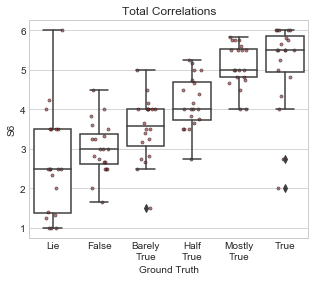

In [30]:
my_plot(dem_df)

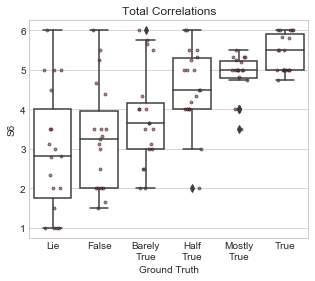

In [21]:
my_plot(rep_df)

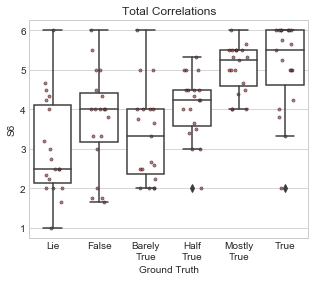

In [25]:
my_plot(ind_df)

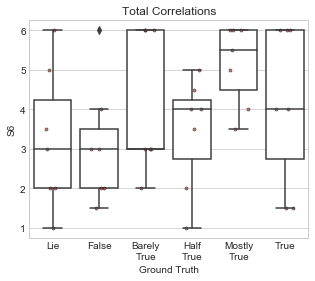

In [24]:
my_plot(else_df)